Dataset: [sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [165]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as pltDecision
import os


In [166]:

# columns
# Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder

file_name = "./Sleep_health_and_lifestyle_dataset.csv"
train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Blood Pressure","Heart Rate","Daily Steps"]
target_column = "Sleep Disorder"

df = pd.read_csv(file_name)
print(df.columns.tolist())

X = df[train_columns]
y = df[target_column]
df.head(15)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [167]:
import pandas as pd
import numpy as np

def convert_to_categories(train_df, conv_num_column = False):
    df_cat = train_df.copy()

    if conv_num_column:

        # Age (27-59 years)
        df_cat['Age'] = pd.cut(df_cat['Age'], bins=[0, 35, 45, 60], labels=[0, 1, 2])

        # Sleep Duration (5.8-8.5 hours)
        df_cat['Sleep Duration'] = pd.cut(df_cat['Sleep Duration'], bins=[0, 6, 7.5, 9], labels=[0, 1, 2])

        # Quality of Sleep (4-9 points)
        df_cat['Quality of Sleep'] = pd.cut(df_cat['Quality of Sleep'], bins=[0, 5, 7, 10], labels=[0, 1, 2])

        # Physical Activity Level (30-90 minutes)
        df_cat['Physical Activity Level'] = pd.cut(df_cat['Physical Activity Level'], bins=[0, 45, 75, 100], labels=[0, 1, 2])

        # Stress Level (3-8 points)
        df_cat['Stress Level'] = pd.cut(df_cat['Stress Level'], bins=[0, 4, 6, 10], labels=[0, 1, 2])

        # Heart Rate (65-86 beats/min)
        df_cat['Heart Rate'] = pd.cut(df_cat['Heart Rate'], bins=[0, 70, 80, 200], labels=[0, 1, 2])

        # Daily Steps (3000-10000 steps)
        df_cat['Daily Steps'] = pd.cut(df_cat['Daily Steps'], bins=[0, 5000, 7500, 15000], labels=[0, 1, 2])

    # Blood Pressure (117/76-140/90)
    def categorize_bp(bp_string):
        systolic = int(bp_string.split('/')[0])
        return systolic

    df_cat['Blood Pressure'] = df_cat['Blood Pressure'].apply(categorize_bp)


    Gender_mapping = {'Male': 1, 'Female': 0}
    df_cat['Gender'] = train_df['Gender'].map(Gender_mapping)

    # Occupation_mapping = {'Doctor':'醫生','Nurse':'護士', 'Engineer':'工程師','Software Engineer':'軟體工程師', 'Teacher':'老師', 'Sales Representative':'銷售','Accountant':'會計', 'Scientist':'科學家'}
    # df_cat['職業'] = train_df['Occupation'].map(Occupation_mapping)

    BMI_Category_mapping = {'Normal': 0, 'Normal Weight': 1,'Overweight': 2,'Obese': 3}
    df_cat['BMI Category'] = train_df['BMI Category'].map(BMI_Category_mapping)

    sleep_disorder_mapping = {'Sleep Apnea': 1, 'Insomnia': 2}
    df_cat['Sleep Disorder'] = train_df['Sleep Disorder'].map(sleep_disorder_mapping).fillna(0)
    return df_cat


In [168]:
df = convert_to_categories(df)

df = df.drop("Occupation", axis=1)

X = df[train_columns]
y = df[target_column]
df.head(15)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,6.1,6,42,6,2,126,77,4200,0.0
1,2,1,28,6.2,6,60,8,0,125,75,10000,0.0
2,3,1,28,6.2,6,60,8,0,125,75,10000,0.0
3,4,1,28,5.9,4,30,8,3,140,85,3000,1.0
4,5,1,28,5.9,4,30,8,3,140,85,3000,1.0
5,6,1,28,5.9,4,30,8,3,140,85,3000,2.0
6,7,1,29,6.3,6,40,7,3,140,82,3500,2.0
7,8,1,29,7.8,7,75,6,0,120,70,8000,0.0
8,9,1,29,7.8,7,75,6,0,120,70,8000,0.0
9,10,1,29,7.8,7,75,6,0,120,70,8000,0.0


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

df_train_std = pd.DataFrame(X_train_std[:5], columns = train_columns)
df_train_std




,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1.044466,0.055811,-0.833457,-1.155098,-0.728644,0.956601,1.078311,0.186918,0.481081,-0.554643
1,1.044466,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,-0.930505,-0.448177,0.481081,-1.180447
2,1.044466,-0.877751,0.436694,0.537913,-0.006920,-0.176166,0.073903,-1.083272,-0.014076,0.696966
3,-0.957427,1.922934,1.325801,1.384419,0.714805,-1.308933,1.078311,1.457107,-0.509234,0.071162
4,-0.957427,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,0.073903,0.440955,2.461710,-1.806251


In [170]:
# Radial Basis Function Kernel
svm = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm.fit(X_train_std, y_train)

sbs = SFS(svm, k_features = 2, forward = True, verbose = 2, scoring = 'accuracy', cv = 4)
sbs.fit(X_train_std, y_train)

selected_features = list(sbs.k_feature_idx_)
print(selected_features)

y_pred = svm.predict(X_test_std)
# sbs acc
print(accuracy_score(y_test, y_pred))


[5, 7]
0.92



[2024-11-26 23:45:45] Features: 1/2 -- score: 0.7257657657657658
[2024-11-26 23:45:45] Features: 2/2 -- score: 0.9096846846846847

[5, 7]


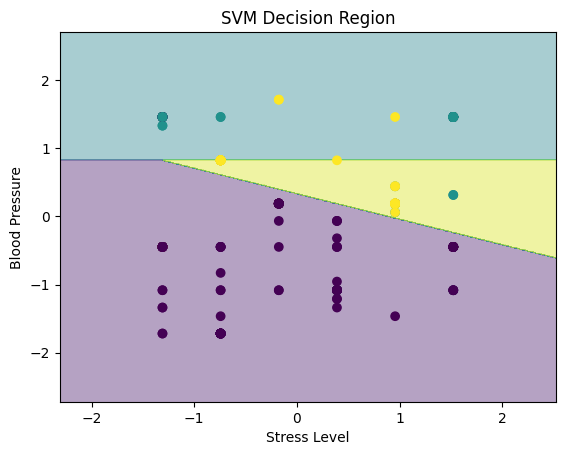

In [171]:

f1, f2 = selected_features
svm.fit(X_train_std[:, selected_features], y_train)
print(selected_features)

x_min, x_max = X_train_std[: , f1].min() - 1, X_train_std[: , f1].max() + 1
y_min, y_max = X_train_std[: , f2].min() - 1, X_train_std[: , f2].max() + 1


# print(x_min, x_max)
# print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.4, cmap = 'viridis')
plt.scatter(X_train_std[:, f1], X_train_std[:, f2], c = y_train, cmap = 'viridis')
plt.xlabel(train_columns[f1])
plt.ylabel(train_columns[f2])
plt.title("SVM Decision Region")
plt.show()


329    0.0
33     0.0
15     0.0
325    0.0
57     0.0
      ... 
94     2.0
195    2.0
312    0.0
292    1.0
372    1.0
Name: Sleep Disorder, Length: 75, dtype: float64 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 2.
 2. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 1. 1. 2. 0. 0. 0. 0.
 2. 0. 1. 1. 1. 0. 2. 1. 1. 2. 1. 0. 0. 2. 0. 0. 2. 0. 2. 0. 0. 0. 0. 2.
 0. 1. 1.]


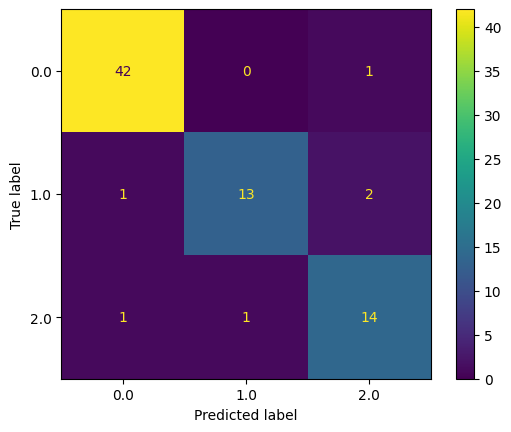

In [172]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(y_test, y_pred)

confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()



In [173]:

print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
print(f"Precision Score: {round(precision_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"Recall Score: {round(recall_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred, average = 'macro')*100, 2)}%")



Accuracy Score: 92.0%
Precision Score: 90.22%
Recall Score: 88.81%
F1 Score: 89.36%
